<a href="https://colab.research.google.com/github/Lakith-Rambukkanage/SigmaLaw-WPP/blob/main/web_scrape/Web_Scrape_summary_desc_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
RAW_CASES_PATH = '/content/drive/Shareddrives/SigmaLaw-WPP/LRR/web_scrape/criminal/summary'
# %cd /content/
!ls

drive  sample_data


In [ ]:
import os
import re

fileList = os.listdir(RAW_CASES_PATH)

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    list.sort(key=natural_keys) sorts in human order
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

fileList.sort(key=natural_keys)

In [ ]:
print(len(fileList))
print(fileList)

15902
['case0.txt', 'case1.txt', 'case2.txt', 'case4.txt', 'case6.txt', 'case7.txt', 'case8.txt', 'case9.txt', 'case10.txt', 'case11.txt', 'case12.txt', 'case14.txt', 'case15.txt', 'case16.txt', 'case17.txt', 'case18.txt', 'case19.txt', 'case21.txt', 'case22.txt', 'case23.txt', 'case24.txt', 'case25.txt', 'case26.txt', 'case28.txt', 'case29.txt', 'case30.txt', 'case31.txt', 'case32.txt', 'case33.txt', 'case34.txt', 'case36.txt', 'case37.txt', 'case38.txt', 'case39.txt', 'case40.txt', 'case41.txt', 'case44.txt', 'case45.txt', 'case46.txt', 'case48.txt', 'case49.txt', 'case50.txt', 'case51.txt', 'case52.txt', 'case53.txt', 'case55.txt', 'case56.txt', 'case57.txt', 'case58.txt', 'case60.txt', 'case61.txt', 'case62.txt', 'case63.txt', 'case64.txt', 'case65.txt', 'case66.txt', 'case67.txt', 'case68.txt', 'case69.txt', 'case70.txt', 'case71.txt', 'case72.txt', 'case73.txt', 'case74.txt', 'case75.txt', 'case76.txt', 'case77.txt', 'case78.txt', 'case79.txt', 'case80.txt', 'case81.txt', 'case82

In [ ]:
sample_data_dict = {}
file_limit = 1000 #for now

count=0
for eachFile in fileList:
    # print(eachFile)
    print(count)
    with open(RAW_CASES_PATH+'/'+eachFile, 'r', encoding="utf8", errors='ignore') as _fp:
        fileData = _fp.read()
        sample_data_dict[eachFile] = fileData
        # print("FILE DATA (%s):\n\n%s\n\n"%(_fp.name, fileData))
    count+=1
    if count==file_limit:
      break

In [ ]:
import pandas as pd
 
sample_df = pd.DataFrame(sample_data_dict,index=['summary']).transpose()
sample_df.head()


,summary
case0.txt,Denial of petition for writ of habeas corpus i...
case1.txt,District court erred in summarily denying peti...
case2.txt,"Defendants' convictions for mail, wire, and ho..."
case4.txt,North Carolina's driver's license revocation i...
case6.txt,After defendant's conviction for a sexual act ...


In [ ]:
sample_df.describe()

,summary
count,1000
unique,998
top,Grant of a motion to suppress evidence in a pr...
freq,2


# Preprocess

In [ ]:
import re

def removeCaseSites(text):
  text = text.lower()
  # text = re.sub("(\[\d{1,3} u.s. \d{1,3}, \d{1,3}\])|(\d{1,3} u.s. \d{1,3}, \d{1,3})|(\d{1,3} u.s. \d{1,3})", " ", text) #[266 U.S. 497, 498] , 480 U.S. 911 
  return text

sample_df['summary'] = sample_df['summary'].apply(removeCaseSites)

In [ ]:
[sample_df.iloc[i]['summary'] for i in range(10,15)]

['petition to review denial of habeas corpus relief from state conviction of murder is denied under the antiterrorism and effective death penalty act of 1996 because no established supreme court precedent was violated or unreasonably applied where: 1) the state court properly admitted out of court statements deemed non-testimonial; 2) any testimonial out of court statements admitted did not cause substantial and injurious effect on the verdict; 3) expert testimony for the defense was discretionarily excluded pursuant to rule 702 of the washington rules of evidence; and 4) expert testimony which opined on an ultimate issue to be resolved by the trier of fact was admitted for the prosecution.',
 "a corporate employee's self-incriminating statements to law enforcement officers are admissible against the corporation in a criminal case, where the employee does not testify, without violating the corporation's 6th amendment right to confront an accuser.",
 "defendant's conviction for threaten

**Reversed**, according to reporting on the Office of the Clerk of the Court means that the judgment below was **absolutely** **wrong**

**vacated** means that the judgment was **less than absolutely wrong**.

**Disposition of cases**

    Affirmed - the judgment of the lower court is correct and should stand.
    Affirmed in part - a portion of the judgment of the lower court was affirmed.
    Dismissed - an order that disposes of the matter without a trial of the issues involved on their merits.
    Dismissed as improvidently granted - the Writ of Certiorari is dismissed as improvidently granted, meaning the Court should not have accepted the case. 
    Dismissed for want of jurisdiction - the Court lacks jurisdiction to decide the question on which certiorari was granted
    Remanded - send back the matter to the court from which it was appealed.  When a judgment is reversed, the Court usually remands the matter for a new trial to be carried out consistent with the principles announced in its opinion.
    Remanded in Part - a portion of the judgment of the lower court was remanded.
    Reversed - changes to the contrary to opinion of the lower court/body.
    Reversed in Part - part of the judgment of the lower court was reversed.
    Vacated - sets aside the judgment of the lower court.
    Vacated in Part - part of the judgment of the lower court was set aside, or vacated.

Legal terms : https://proquest.libguides.com/supremecourtinsight/glossary 


# Decsion extraction

In [ ]:
# "dismissed" - "the petition for a writ of certiorari is denied"(last part) "Certiorari denied"(first part) "Appeal dismissed and certiorari denied"(first part)
# "affirmed"  - "affirmed" (last part) "Rehearing denied"(first part)
# "reversed" - "reversed" (last part)
# "vacated" - "" (last with regx)
# "reversed and remanded" - "reversed and remanded" (last with regx)
# "vacated and remanded" -"vacated and remanded"(last with regx)  "The petition for a writ of certiorari is granted"(last) "judgment vacated; and case remanded"(first)
# "reversed in part and remanded" (last with regx)
# "vacated in part and remanded" (lasy with regx)


In [ ]:
rulesDict = {
    "AFFIRMED" : ["affirmed","denied"], #rehearing denied
    "REVERSED":["reversed"],
    "VACATED":["vacated"],
    "DISMISSED" :["dismissed","certiorari denied","certiorari is denied"],#"appeal dismissed and certiorari denied"
    "DISSENT":["dissent"],#just dissent is errorness ["i respectfully dissent","i dissent",]
}

In [ ]:
count =0
def extractDecision(text):
  global count
  desc = applyPartRules(text,rulesDict)
  if desc not in ["AFFIRMED","REVERSED","VACATED","DISMISSED","DISSENT"]:#,"NOT_FOUND"]:
    print("----%s"%count)
    print(desc)
  count+=1
  return desc

def applyPartRules(para,rulesDict):
  matchDescConcat = ""
  for decisionKey, rulesList in rulesDict.items():
    for rule in rulesList:
      match = re.search(rule, para)#, re.IGNORECASE)
      if match:
        matchDescConcat+=decisionKey
        # break
        return decisionKey
  if matchDescConcat!="":
    return matchDescConcat
  else:
    return "NOT_FOUND"

# extractDecision(sample_df.iloc[5]['summary'])

In [ ]:
sample_df['decision'] = sample_df['summary'].apply(extractDecision)

----1
NOT_FOUND
----3
NOT_FOUND
----4
NOT_FOUND
----6
NOT_FOUND
----7
NOT_FOUND
----8
NOT_FOUND
----11
NOT_FOUND
----13
NOT_FOUND
----14
NOT_FOUND
----15
NOT_FOUND
----17
NOT_FOUND
----24
NOT_FOUND
----28
NOT_FOUND
----32
NOT_FOUND
----37
NOT_FOUND
----38
NOT_FOUND
----39
NOT_FOUND
----41
NOT_FOUND
----42
NOT_FOUND
----43
NOT_FOUND
----47
NOT_FOUND
----50
NOT_FOUND
----53
NOT_FOUND
----58
NOT_FOUND
----61
NOT_FOUND
----63
NOT_FOUND
----71
NOT_FOUND
----73
NOT_FOUND
----80
NOT_FOUND
----81
NOT_FOUND
----83
NOT_FOUND
----86
NOT_FOUND
----95
NOT_FOUND
----103
NOT_FOUND
----104
NOT_FOUND
----112
NOT_FOUND
----121
NOT_FOUND
----123
NOT_FOUND
----125
NOT_FOUND
----127
NOT_FOUND
----128
NOT_FOUND
----133
NOT_FOUND
----139
NOT_FOUND
----141
NOT_FOUND
----146
NOT_FOUND
----147
NOT_FOUND
----153
NOT_FOUND
----154
NOT_FOUND
----155
NOT_FOUND
----158
NOT_FOUND
----163
NOT_FOUND
----166
NOT_FOUND
----167
NOT_FOUND
----174
NOT_FOUND
----176
NOT_FOUND
----190
NOT_FOUND
----195
NOT_FOUND
----197
NOT_F

In [ ]:
[sample_df.iloc[i]['summary'] for i in [24,28,32,71,197]]

['three-month old evidence is not too stale for a search warrant in a drug case when accompanied by evidence that defendant engaged in drug trafficking over long period of time.',
 'a prior conviction of assault with intent to commit lewd touching (pen. code, section 220) qualifies as a strike under the three strikes statutes because it is considered a serious felony under section pen. code section 1192.7, subdivision (c)(39).',
 'district court did not err in denying motion for mitigating role reduction. defendant adduced no evidence to support his claim that the bulk of the methamphetamine was not his.',
 'by arguing a change in decisional law justified the issuance of a writ of habeas corpus, defendant failed to demonstrate the requisite "extraordinary circumstances" to justify relief under rule 60(b)(6) of the federal rules of civil procedure.',
 'because both the traffic stop and collective knowledge of the investigating officers supplied probable cause not only to detain but to a

In [ ]:
sample_df['decision'].value_counts(normalize=True)

AFFIRMED     0.426
NOT_FOUND    0.376
REVERSED     0.128
VACATED      0.056
DISMISSED    0.013
DISSENT      0.001
Name: decision, dtype: float64

In [ ]:
sample_df['decision'].value_counts()

AFFIRMED             379
NOT_FOUND            376
REVERSED             123
VACATED               56
AFFIRMEDVACATED       20
AFFIRMEDREVERSED      20
DISMISSED             13
AFFIRMEDDISMISSED      7
REVERSEDVACATED        5
DISSENT                1
Name: decision, dtype: int64

# Body extract

In [ ]:
count =0
def extractBody(text,returnLable=False):
  global count
  # print ("----%s"%count)
  count+=1
  list_of_para = text.split('\n')
  list_of_para = list(filter(filterConditions, list_of_para))
  footNoteIndex = getFirstFootnoteIndex(list_of_para)
  if footNoteIndex > 0:
    list_of_para = list_of_para[:footNoteIndex]
  num_of_para = len(list_of_para)
  if num_of_para<=5:
    return "ONLY_5_PARAS" if returnLable else ""
  else:
    list_of_para.pop(0)
    list_of_para.pop(0)
    last_of_top = list_of_para.pop(0)
    # print ("--Last of top\n"+last_of_top[:50])
    list_of_para.pop(-1)
    list_of_para.pop(-1)
    body = "\n".join(list_of_para)
    rough_word_count= len(body.split(" "))
    if rough_word_count>500:
      return "GOOD" if returnLable else body
    else:
      return "TOO_SHORT" if returnLable else ""


In [ ]:
sample_df['body_quality'] = sample_df['text'].apply(lambda x: extractBody(x,True))

In [ ]:
sample_df.head()

,text,decision,body_quality
1.txt,united states supreme court sanders v. armour ...,AFFIRMED,GOOD
2.txt,united states supreme court murel v. baltimore...,DISMISSED,GOOD
3.txt,"united states supreme court lipham v. georgia,...",AFFIRMED,GOOD
4.txt,"united states supreme court murphy v. utter, (...",AFFIRMED,GOOD
5.txt,united states supreme court helvering v. twin ...,REVERSED,GOOD


In [ ]:
sample_df['body_quality'].value_counts()#normalize=True,bins=range(0,20000,500))

GOOD            18074
TOO_SHORT        3746
ONLY_5_PARAS      956
Name: body_quality, dtype: int64

In [ ]:
# sample_df.hist(column="body_quality",bins=range(0,20000,100),figsize=[15,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35662c7dd0>]],
      dtype=object)

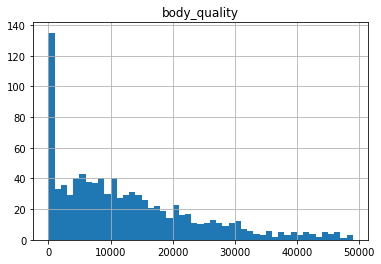

In [ ]:
sample_df.hist(column="body_quality",bins=range(0,50000,1000))

In [ ]:
import random

In [ ]:
random_index = random.randint(0,file_limit-1)
print(sample_df.iloc[random_index]['decision'])
random_index

DISMISSED


608

In [ ]:
before_text = sample_df.iloc[random_index]['text'].split('\n')
before_text

In [ ]:
after_text = extractBody(sample_df.iloc[random_index]['text']).split("\n")
after_text
print("--top--")
print ("\n".join(after_text[0:1]))
print("--last--")
print ("\n".join(after_text[-3:]))

In [ ]:
sample_df['body'] = sample_df['text'].apply(lambda x: extractBody(x,False))

#Identify Applicable from good and found

In [ ]:
def findApplicable(df):
  if df['body_quality']!="GOOD" or df['decision']=="NOT_FOUND":
    return "NOT_APPL"
  else:
    return 'APPLICABLE'

In [ ]:
sample_df['applicable']=sample_df.apply(findApplicable,axis=1)

In [ ]:
sample_df['applicable'].value_counts()

APPLICABLE    14649
NOT_APPL       8127
Name: applicable, dtype: int64

In [ ]:
sample_df.head()

,text,decision,body_quality,applicable,body
1.txt,united states supreme court sanders v. armour ...,AFFIRMED,GOOD,APPLICABLE,"mr. george s. wright, of dallas, tex., for res..."
2.txt,united states supreme court murel v. baltimore...,DISMISSED,GOOD,APPLICABLE,karl g. feissner and andrew e. greenwald argue...
3.txt,"united states supreme court lipham v. georgia,...",AFFIRMED,GOOD,APPLICABLE,on petition for writ of certiorari to the supr...
4.txt,"united states supreme court murphy v. utter, (...",AFFIRMED,GOOD,APPLICABLE,"prior to this decision, however, owing to doub..."
5.txt,united states supreme court helvering v. twin ...,REVERSED,GOOD,APPLICABLE,mr. justice roberts delivered the opinion of t...


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22776 entries, 1.txt to 22776.txt
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          22776 non-null  object
 1   decision      22776 non-null  object
 2   body_quality  22776 non-null  object
 3   applicable    22776 non-null  object
 4   body          22776 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
output_version = 1
output_name = "decision_annotated_v%s.csv"%output_version
# compression_opts = dict(method='zip',
                        # archive_name=output_name)
output_df = sample_df.drop(columns="text")
output_df.head()


,decision,body_quality,applicable,body
1.txt,AFFIRMED,GOOD,APPLICABLE,"mr. george s. wright, of dallas, tex., for res..."
2.txt,DISMISSED,GOOD,APPLICABLE,karl g. feissner and andrew e. greenwald argue...
3.txt,AFFIRMED,GOOD,APPLICABLE,on petition for writ of certiorari to the supr...
4.txt,AFFIRMED,GOOD,APPLICABLE,"prior to this decision, however, owing to doub..."
5.txt,REVERSED,GOOD,APPLICABLE,mr. justice roberts delivered the opinion of t...


In [ ]:
output_df.to_csv(output_name)#,compression=compression_opts)
output_name

'decision_annotated_v1.csv'

In [ ]:
!ls

 decision_annotated_v1.csv   sample_data
 drive			    'us-supreme-court[raw-cases-22776]'


In [ ]:
!cp /content/decision_annotated_v1.csv "/content/drive/Shareddrives/SigmaLaw-WPP/LRR/"